In [5]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [6]:
RESULTS_BASE_PATH = 'RESULTS'

NODES = [(5, 8), (8, 5), (5, 12), (8, 12)]

plt.rcParams['figure.figsize'] = [13, 10]
# FAILUER_TIME = 16000

In [7]:
def load_results(exp_name):
    exp_path = os.path.join(RESULTS_BASE_PATH, exp_name)
    y_test = np.load(os.path.join(exp_path, "true.npy"))
    y_predicted = np.load(os.path.join(exp_path, "predicted.npy"))

    return (y_test, y_predicted)

def absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.abs((y_true - y_pred) / y_true) * 100

def calculate_99_mean_absolute_percentage_error(y_true, y_pred): 
    error = absolute_percentage_error(y_true, y_pred)

    to_take = int(len(y_true) * 0.99)
    sorted = np.sort(error)

    error_99 = sorted[:to_take]

    print(f'99% MAPE: {np.mean(error_99)}')

def plot_prediction(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'Prediction - {title}')
    plt.plot(x_axis, y_test, label='real', linewidth=1)
    plt.plot(x_axis, y_predicted, label='predicted', linewidth=1)
    plt.legend()
    plt.show()

def plot_percentage_error(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'Error - {title}')
    error = absolute_percentage_error(y_test, y_predicted)
    plt.plot(x_axis, error, label='error', linewidth=1)
    plt.show()

def analyze_experiment_singlestep(exp_name, node, subsection=(0, 100)):
    y_test, y_predicted = load_results(exp_name)
    y_test = y_test.reshape(-1)
    y_predicted = y_predicted.reshape(-1)


    calculate_99_mean_absolute_percentage_error(y_test, y_predicted)
    print(f'NODE {node} - TOTAL MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    y_test = y_test[subsection[0] : subsection[1]]
    y_predicted = y_predicted[subsection[0] : subsection[1]]

    print(f'NODE {node} - SECTION MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    plot_prediction(y_test, y_predicted, node)
    plot_percentage_error(y_test, y_predicted, node)

def analyze_all_experiments_singlestep(exp_name, subsection=(0, 100)):
    for n_from, n_to in NODES:
        analyze_experiment_singlestep(f'{exp_name}___{n_from}to{n_to}', f'{n_from} to {n_to}', subsection)


99% MAPE: 19.756567671616445
NODE 5 to 8 - TOTAL MAPE:  0.5657057652851738
NODE 5 to 8 - SECTION MAPE:  0.0658458203800846


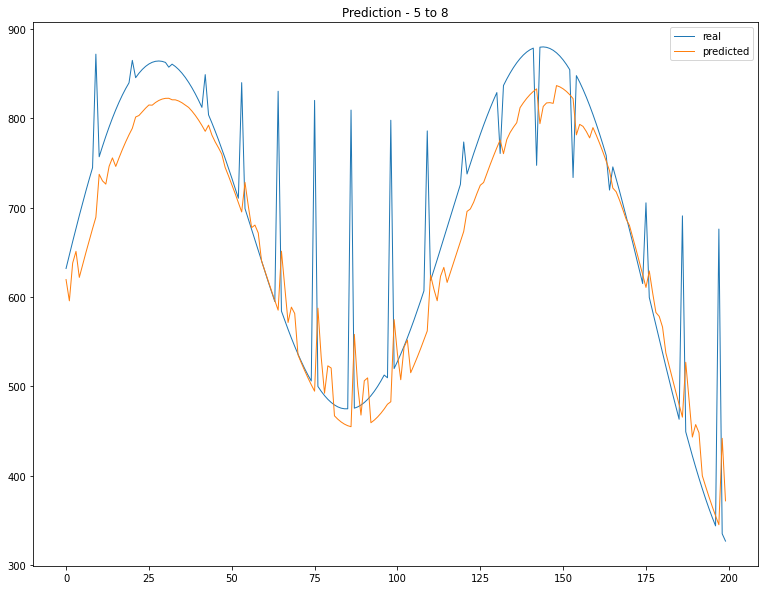

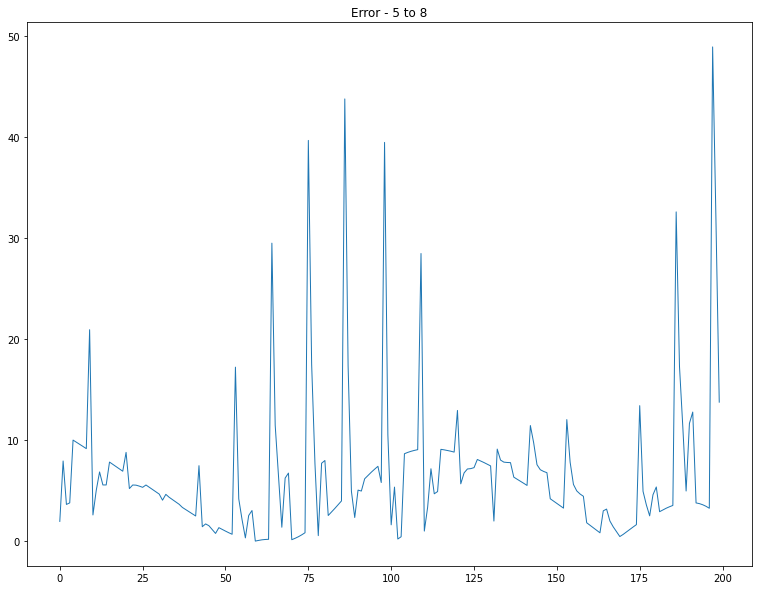

99% MAPE: 27.69662555071282
NODE 8 to 5 - TOTAL MAPE:  0.869881870706727
NODE 8 to 5 - SECTION MAPE:  0.22449620211787236


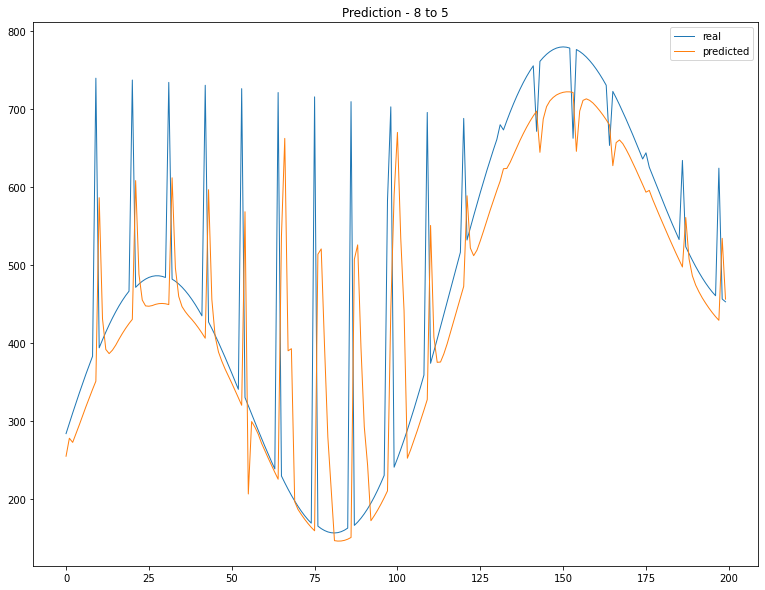

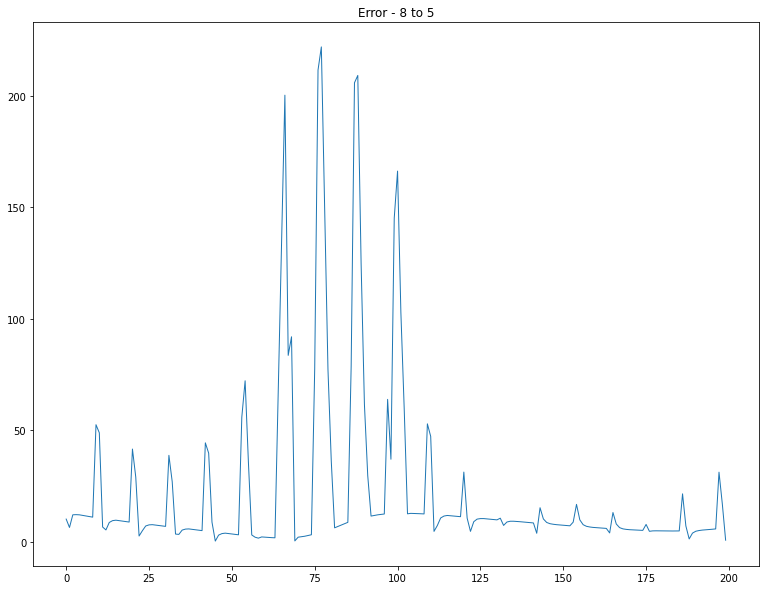

99% MAPE: 52.94015393540396
NODE 5 to 12 - TOTAL MAPE:  2.1226808163311843
NODE 5 to 12 - SECTION MAPE:  0.2109432846640354


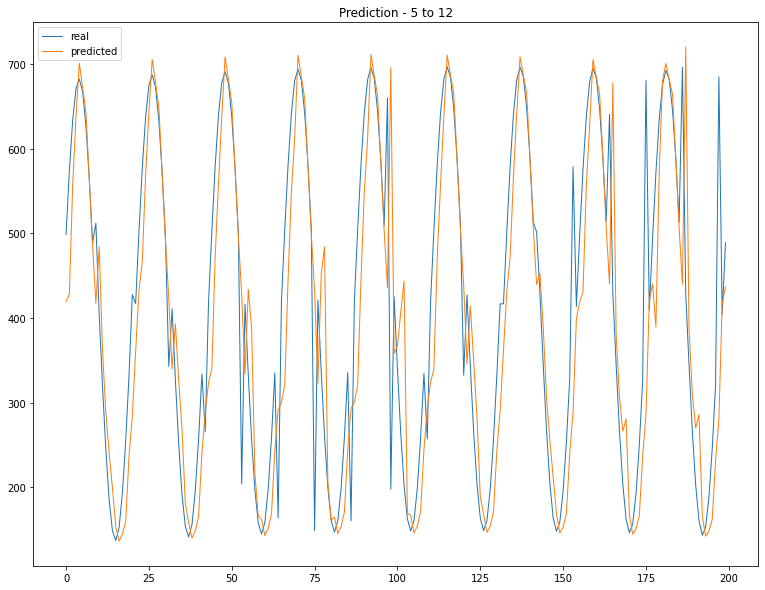

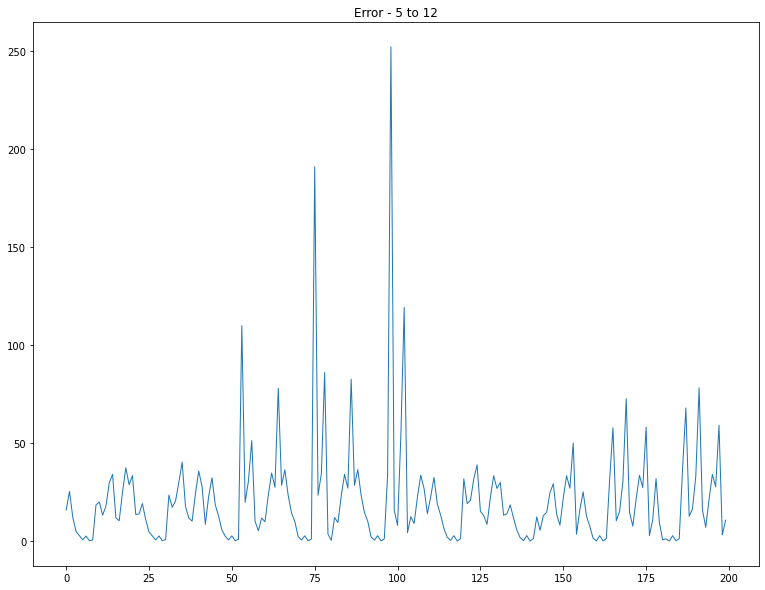

99% MAPE: 135.9623275116316
NODE 8 to 12 - TOTAL MAPE:  252.48824682117905
NODE 8 to 12 - SECTION MAPE:  85.75205390732908


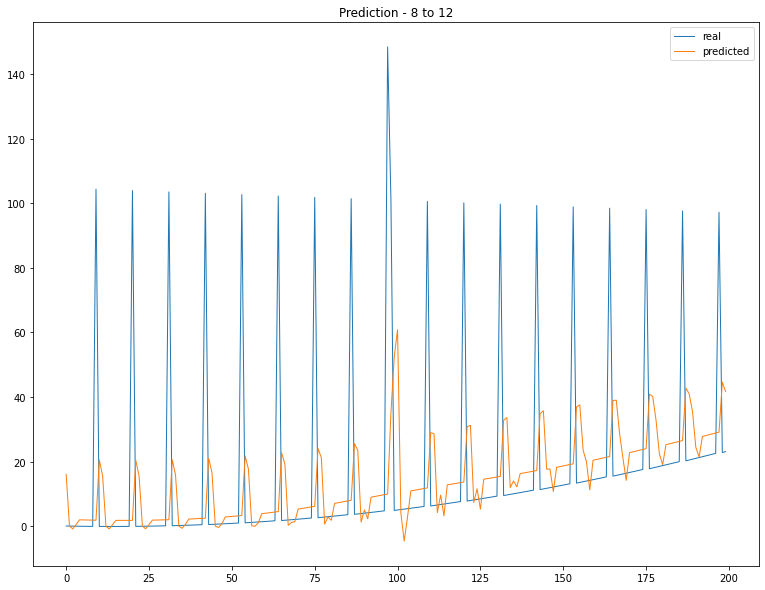

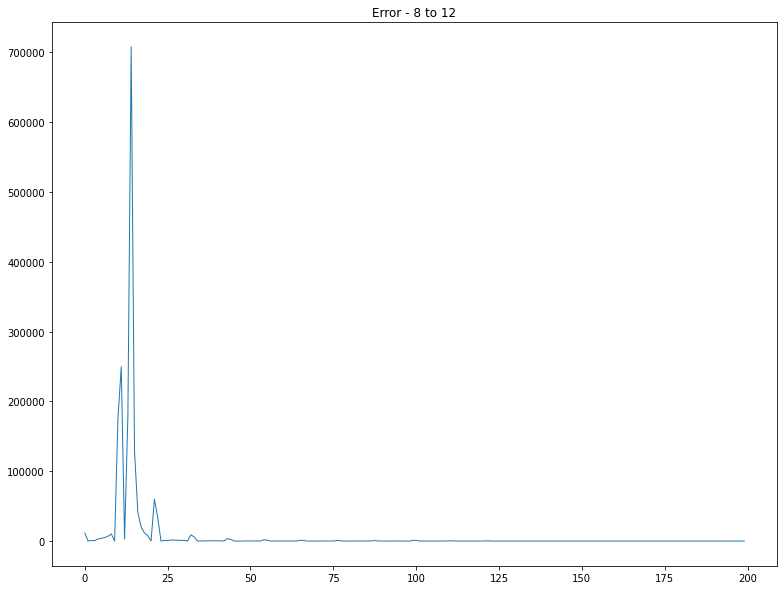

99% MAPE: 22.053118449657592
NODE 5 to 8 - TOTAL MAPE:  0.6412063571426898
NODE 5 to 8 - SECTION MAPE:  0.07277723002275435


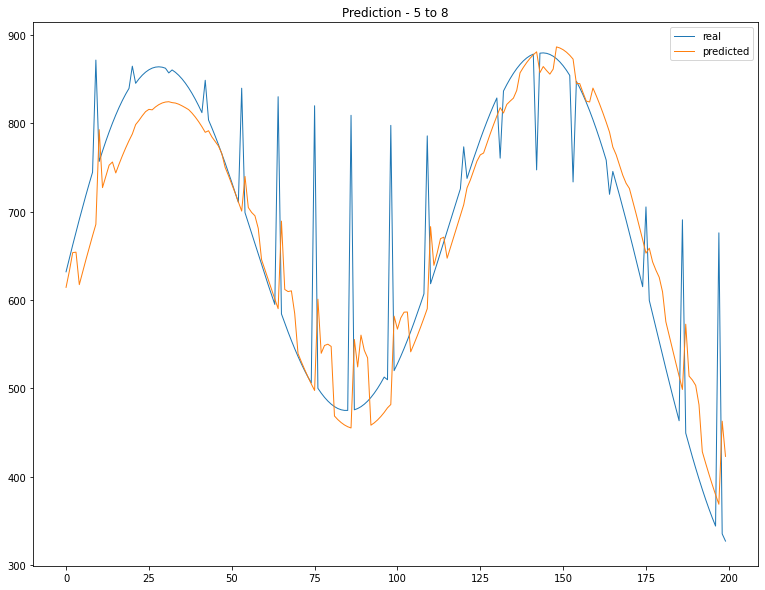

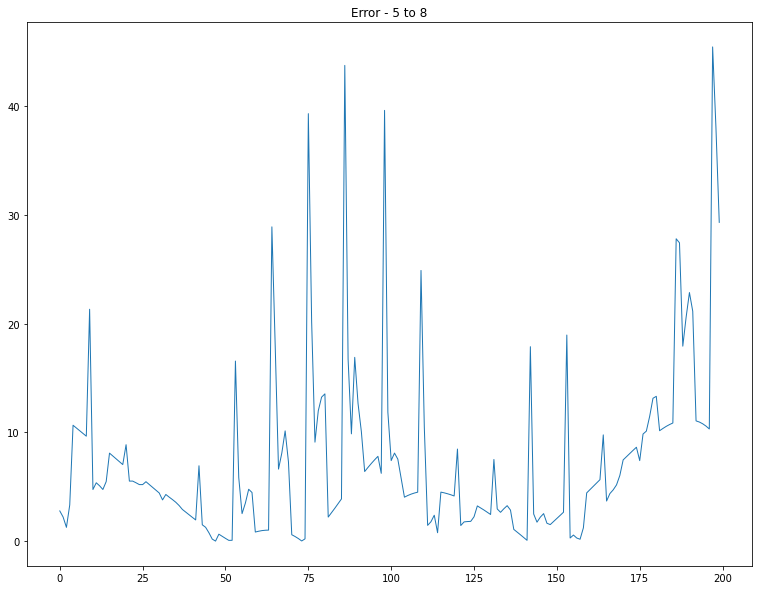

99% MAPE: 17.776628558374593
NODE 8 to 5 - TOTAL MAPE:  0.43189002990465514
NODE 8 to 5 - SECTION MAPE:  0.13166032514731993


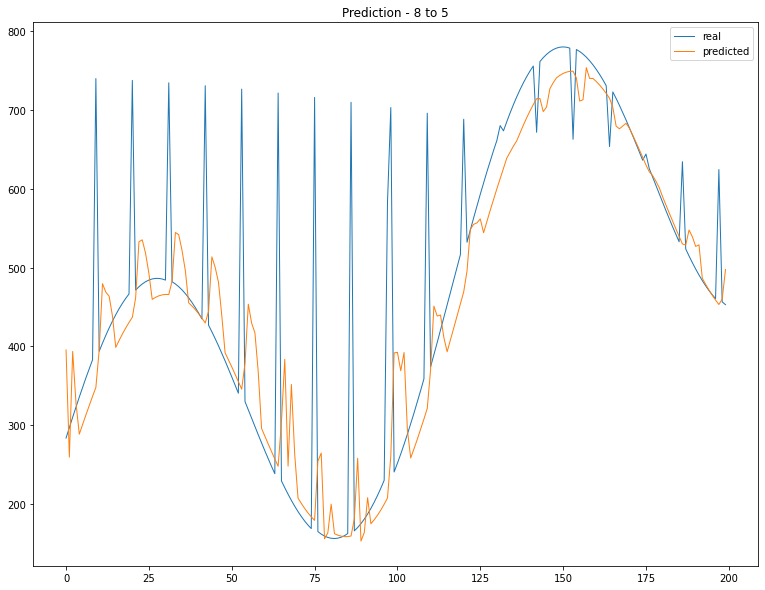

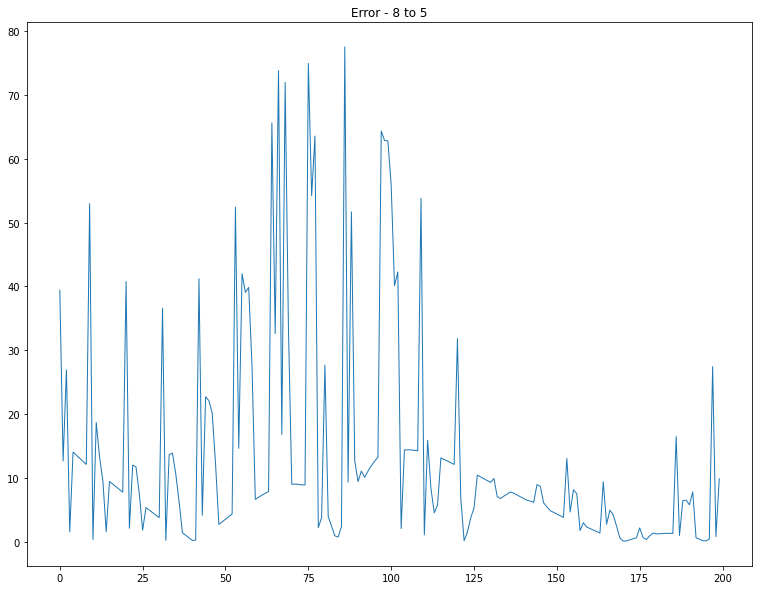

99% MAPE: 44.72923044909925
NODE 5 to 12 - TOTAL MAPE:  1.5914164800498916
NODE 5 to 12 - SECTION MAPE:  0.30608738652008055


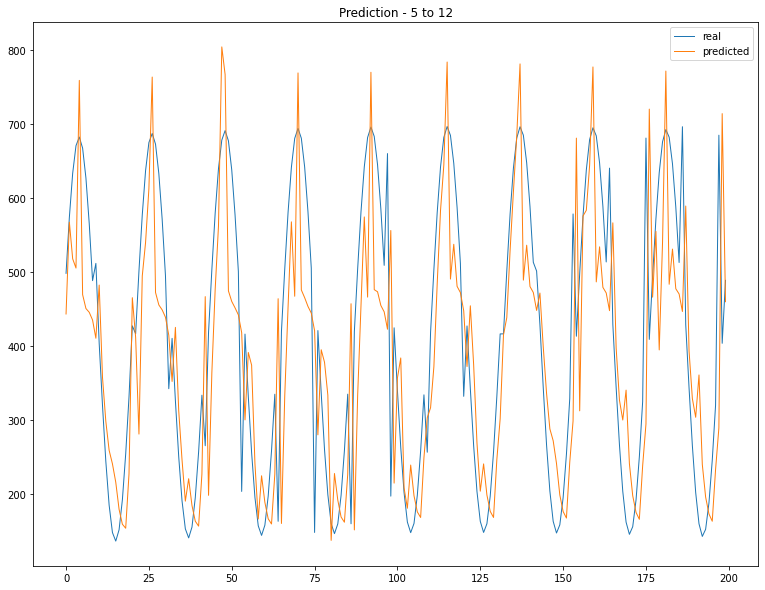

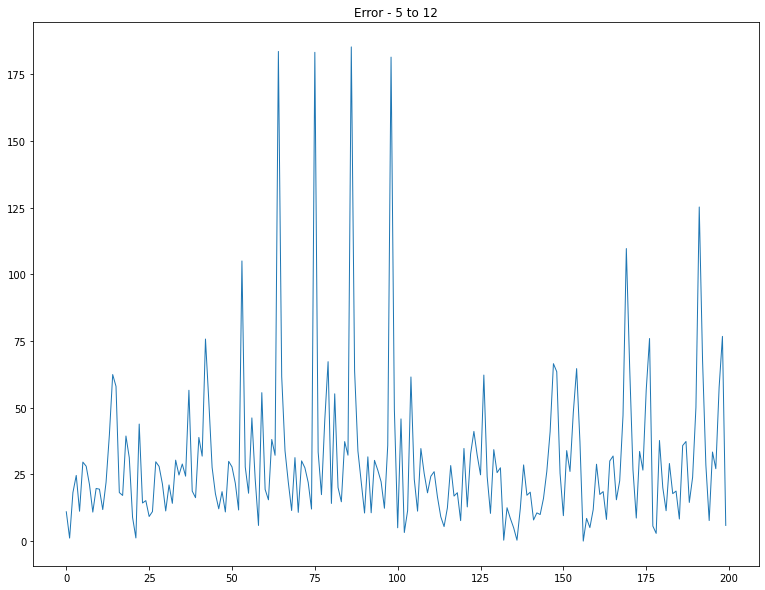

99% MAPE: 262.35541143783007
NODE 8 to 12 - TOTAL MAPE:  305.7986658995104
NODE 8 to 12 - SECTION MAPE:  238.2485617871713


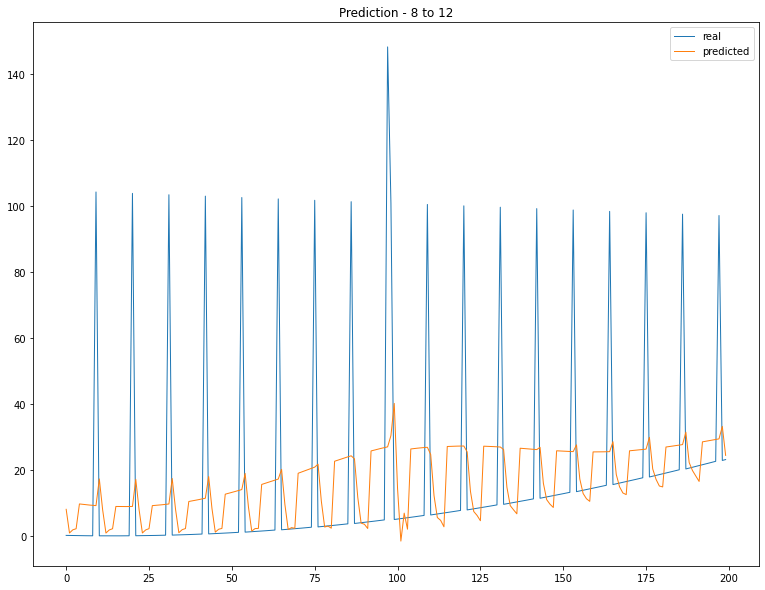

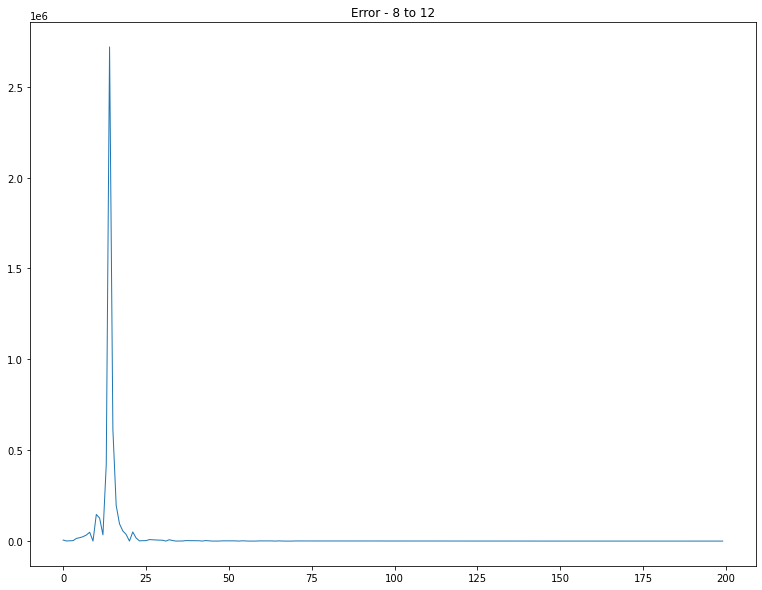

In [8]:
analyze_all_experiments_singlestep('LSTM_5_in_1_out', (5900, 6100))
analyze_all_experiments_singlestep('LSTM_CHUNK_5_in_1_out', (5900, 6100))

